# Neural Networks using Keras

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Flatten

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import mean_absolute_error

%matplotlib inline

Using Theano backend.


In [2]:
features = pd.read_csv('dengue_features_train.csv')
target = pd.read_csv('dengue_labels_train.csv')
df = pd.merge(features, target, on=['city','year','weekofyear'])

In [3]:
df.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [4]:
df.fillna(method='ffill', inplace=True)

In [5]:
df.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [6]:

iq_df = df[df['city'] == 'iq']
sj_df = df[df['city']=='sj']

In [7]:
iq_df['week_start_date'] = pd.to_datetime(iq_df['week_start_date'])
sj_df['week_start_date'] = pd.to_datetime(sj_df['week_start_date'])

iq_df.set_index('week_start_date', inplace=True)
sj_df.set_index('week_start_date', inplace=True)

/Users/jasonjklim/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jasonjklim/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
iq_train_size = int(len(iq_df) * .8)
sj_train_size = int(len(sj_df) * .8)

print(iq_train_size, sj_train_size)

416 748


In [9]:
iq_train = iq_df.iloc[:iq_train_size, :]
iq_test = iq_df.iloc[iq_train_size:, :]

sj_train = sj_df.iloc[:sj_train_size, :]
sj_test = sj_df.iloc[sj_train_size:, :]

In [10]:
iq_train.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
week_start_date,,,,,,,,,,,,,,,,,,,,,,,,
2000-07-01,iq,2000,26,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,298.450000,295.184286,307.3,293.1,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
2000-07-08,iq,2000,27,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,298.428571,295.358571,306.6,291.1,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
2000-07-15,iq,2000,28,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,297.392857,295.622857,304.5,292.6,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
2000-07-22,iq,2000,29,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,296.228571,292.797143,303.6,288.6,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
2000-07-29,iq,2000,30,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,297.635714,293.957143,307.0,291.5,31.80,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


In [11]:
df_train = pd.concat((sj_train, iq_train), axis=0)
df_test = pd.concat((sj_test, iq_test), axis=0)

In [12]:
df_train = pd.concat([df_train.drop("city", axis=1),pd.get_dummies(df_train['city'])],axis=1)
df_test = pd.concat([df_test.drop("city", axis=1),pd.get_dummies(df_test['city'])],axis=1)                        

In [13]:
# re-assign X_train, test and y_train, test after missing value treatment
X_train = df_train.drop('total_cases', axis=1)
y_train = df_train['total_cases']

X_test = df_test.drop('total_cases', axis=1)
y_test = df_test['total_cases']

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1164, 24) (292, 24) (1164,) (292,)


In [14]:
ss= StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)


In [15]:
model = Sequential()



model.add(Dense(24, input_dim=24, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1))


model.compile(loss='mean_absolute_error', optimizer='adam')

model.fit(Xs_train, y_train, validation_data=(Xs_test, y_test), epochs=60, batch_size=20)

Train on 1164 samples, validate on 292 samples
Epoch 1/60
1164/1164 [==============================] - 0s 25us/step - loss: 24.1669 - val_loss: 15.0989
Epoch 2/60
1164/1164 [==============================] - 0s 22us/step - loss: 20.0590 - val_loss: 13.8955
Epoch 3/60
1164/1164 [==============================] - 0s 19us/step - loss: 18.0255 - val_loss: 14.1557
Epoch 4/60
1164/1164 [==============================] - 0s 19us/step - loss: 17.6589 - val_loss: 13.8584
Epoch 5/60
1164/1164 [==============================] - 0s 24us/step - loss: 17.4509 - val_loss: 13.6818
Epoch 6/60
1164/1164 [==============================] - 0s 23us/step - loss: 17.2505 - val_loss: 13.5384
Epoch 7/60
1164/1164 [==============================] - 0s 26us/step - loss: 17.1038 - val_loss: 13.5083
Epoch 8/60
1164/1164 [==============================] - 0s 23us/step - loss: 16.9542 - val_loss: 13.4931
Epoch 9/60
1164/1164 [==============================] - 0s 19us/step - loss: 16.8550 - val_loss: 13.3970
Epoch 10

In [16]:
y_pred = model.predict(Xs_test).round()

print(mean_absolute_error(y_test, y_pred))

13.1061643836


In [17]:

df_test['pred']= y_pred

sj_plot = df_test[df_test['sj']==1]

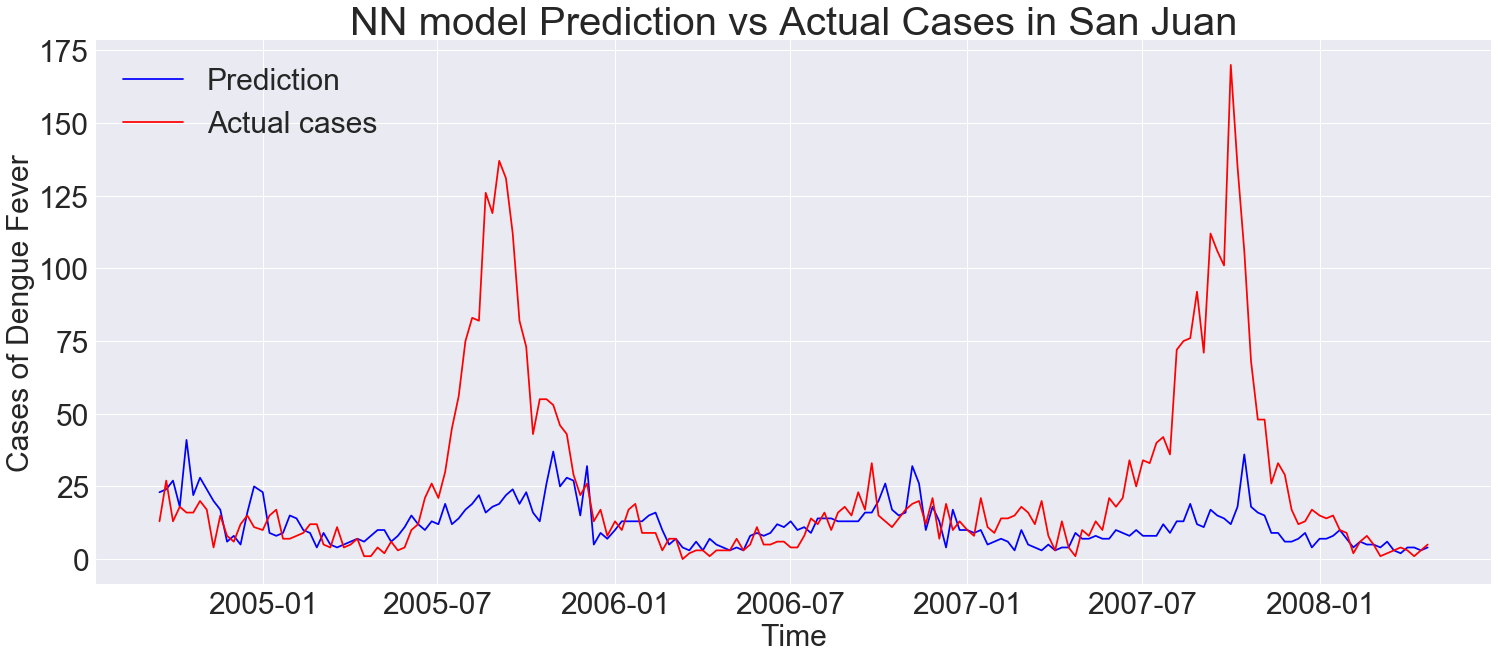

In [18]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.plot('pred', data=sj_plot, label='Prediction', color='b')
plt.plot('total_cases',data=sj_plot, label='Actual cases', color ='r')


plt.legend(loc=2, prop={'size': 30})
plt.xlabel('Time', fontsize=30)
plt.ylabel('Cases of Dengue Fever', fontsize=30)
plt.title('NN model Prediction vs Actual Cases in San Juan', fontsize=40)
ax.tick_params(labelsize=30)
plt.grid(True);

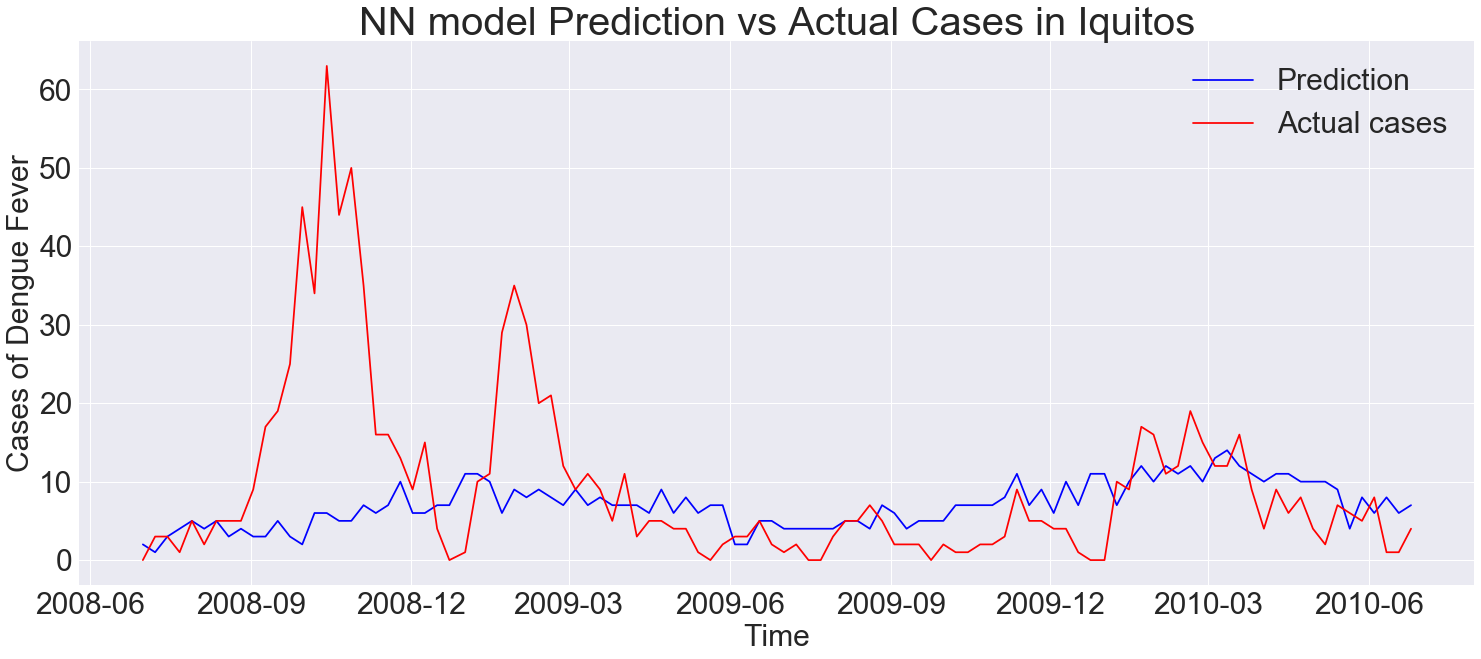

In [19]:
iq_plot = df_test[df_test['iq']==1]

fig, ax = plt.subplots(figsize=(25, 10))
plt.plot('pred', data=iq_plot, label='Prediction', color='b')
plt.plot('total_cases',data=iq_plot, label='Actual cases', color ='r')


plt.legend(loc=1, prop={'size': 30})
plt.xlabel('Time', fontsize=30)
plt.ylabel('Cases of Dengue Fever', fontsize=30)
plt.title('NN model Prediction vs Actual Cases in Iquitos', fontsize=40)
ax.tick_params(labelsize=30)
plt.grid(True);